In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

# Data importation

## Original movie data

In [87]:
df_movies = pd.read_csv('../../data/cleanData/movies_cleaned.csv')

df_movies.head(10)

,wiki_id,freebase_id,original_title,release_date,revenue,runtime,languages,countries,genres,countries_freebase_id,languages_freebase_id,genres_freebase_id
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,['English Language'],['United States of America'],"['Thriller', 'Science Fiction', 'Horror', 'Adv...",['/m/09c7w0'],['/m/02h40lc'],"['/m/01jfsb', '/m/06n90', '/m/03npn', '/m/03k9..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,['English Language'],['United States of America'],"['Mystery', 'Biographical film', 'Drama', 'Cri...",['/m/09c7w0'],['/m/02h40lc'],"['/m/02n4kr', '/m/03bxz7', '/m/07s9rl0', '/m/0..."
2,28463795,/m/0crgdbh,Brun bitter,1988-01-01,NaN,83.0,['Norwegian Language'],['Norway'],"['Crime Fiction', 'Drama']",['/m/05b4w'],['/m/05f_3'],"['/m/0lsxr', '/m/07s9rl0']"
3,9363483,/m/0285_cd,White Of The Eye,1987-01-01,NaN,110.0,['English Language'],['United Kingdom'],"['Thriller', 'Erotic thriller', 'Psychological...",['/m/07ssc'],['/m/02h40lc'],"['/m/01jfsb', '/m/0glj9q', '/m/09blyk']"
4,261236,/m/01mrr1,A Woman in Flames,1983-01-01,NaN,106.0,['German Language'],['Germany'],['Drama'],['/m/0345h'],['/m/04306rv'],['/m/07s9rl0']
5,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"['Silent film', 'English Language']",['United States of America'],"['Short Film', 'Silent film', 'Indie', 'Black-...",['/m/09c7w0'],"['/m/06ppq', '/m/02h40lc']","['/m/02hmvc', '/m/06ppq', '/m/0219x_', '/m/01g..."
6,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002-01-01,NaN,86.0,['English Language'],['South Africa'],"['Family Film', 'Fantasy', 'Adventure', 'World...",['/m/0hzlz'],['/m/02h40lc'],"['/m/0hqxf', '/m/01hmnh', '/m/03k9fj', '/m/03q..."
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,['English Language'],['United States of America'],"['Musical', 'Comedy', 'Black-and-white']",['/m/09c7w0'],['/m/02h40lc'],"['/m/04t36', '/m/01z4y', '/m/01g6gs']"
8,9997961,/m/06_y2j7,Contigo y aquí,1974-01-01,NaN,NaN,['Spanish Language'],['Argentina'],"['Musical', 'Drama', 'Comedy']",['/m/0jgd'],['/m/06nm1'],"['/m/04t36', '/m/07s9rl0', '/m/01z4y']"
9,2345652,/m/075f66,City of the Dead,1960-01-01,NaN,76.0,['English Language'],['United Kingdom'],"['Horror', 'Supernatural']",['/m/07ssc'],['/m/02h40lc'],"['/m/03npn', '/m/0fdjb']"


In [76]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81741 entries, 0 to 81740
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   wiki_id                81741 non-null  int64  
 1   freebase_id            81741 non-null  object 
 2   original_title         81741 non-null  object 
 3   release_date           74839 non-null  object 
 4   revenue                8401 non-null   float64
 5   runtime                61291 non-null  float64
 6   languages              81741 non-null  object 
 7   countries              81741 non-null  object 
 8   genres                 81741 non-null  object 
 9   countries_freebase_id  81741 non-null  object 
 10  languages_freebase_id  81741 non-null  object 
 11  genres_freebase_id     81741 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 7.5+ MB


## Additional movie data from Kaggle

In [110]:
df_movies_additional = pd.read_csv('../../data/additionalData/Kaggle_movie_data_tmdb_filtered.csv')
df_movies_additional.head(2)

,imdb_id,original_title,original_language,budget,revenue,release_date,title
0,tt0055827,Le Caporal épinglé,fr,0,0,1962-05-23,The Elusive Corporal
1,tt0055910,Cybèle ou les dimanches de ville d'Avray,fr,0,0,1962-11-12,Sundays and Cybele


## Inflation dataset from Kaggle

In [89]:
df_inflation_additional_monthly = pd.read_csv('../../data/additionalData/Kaggle_US_CPI.csv')
df_inflation_additional_monthly.head(2)

,Yearmon,CPI
0,01-01-1913,9.8
1,01-02-1913,9.8


# Data preprocessing

## Additional movie data from Kaggle

Convert budget to pd.to_numeric format

In [79]:
df_movies_additional['budget'] = pd.to_numeric(df_movies_additional['budget'], errors='coerce')

## Additional movie data from Kaggle where budget is not null

In [80]:
df_movies_additional_filtered = df_movies_additional.loc[df_movies_additional['budget'] != 0]

## Inflation dataset from Kaggle

In [97]:
df_inflation_additional_monthly['Yearmon'] = pd.to_datetime(df_inflation_additional_monthly['Yearmon'])
df_inflation_additional_monthly['year'] = df_inflation_additional_monthly['Yearmon'].dt.year
df_inflation_additional_annual = df_inflation_additional_monthly.groupby('year')['CPI'].mean().reset_index()

Save cleaned datasets

In [112]:
def save_dataset(df, filename):
    file_path = f'../../data/cleanData/{filename}.csv'
    df.to_csv(file_path, index=False)
    print(f"Saved {filename} to {file_path}")

# Save cleaned dataset
save_dataset(df_inflation_additional_monthly, 'Kaggle_US_CPI_monthly_cleaned')
save_dataset(df_movies_additional, 'Kaggle_movie_data_tmdb_cleaned')
save_dataset(df_movies_additional_filtered, 'Kaggle_movie_data_tmdb_filtered_cleaned')
save_dataset(df_inflation_additional_annual, 'Kaggle_US_CPI_annual_cleaned')

Saved Kaggle_US_CPI_monthly_cleaned to ../../data/cleanData/Kaggle_US_CPI_monthly_cleaned.csv
Saved Kaggle_movie_data_tmdb_cleaned to ../../data/cleanData/Kaggle_movie_data_tmdb_cleaned.csv
Saved Kaggle_movie_data_tmdb_filtered_cleaned to ../../data/cleanData/Kaggle_movie_data_tmdb_filtered_cleaned.csv
Saved Kaggle_US_CPI_annual_cleaned to ../../data/cleanData/Kaggle_US_CPI_annual_cleaned.csv


# Data statistics overview

In [81]:
from matplotlib_venn import venn2

def intersectionIMDbID(df1, df2, name1, name2, id_column='id'):
    # Ids extraction from each DataFrame
    ids1 = set(df1[id_column].unique())
    ids2 = set(df2[id_column].unique())
    
    # Compute intersection and differences
    intersection = ids1 & ids2
    only_df1 = ids1 - ids2
    only_df2 = ids2 - ids1
    
    # Count elements
    count_intersection = len(intersection)
    count_only_df1 = len(only_df1)
    count_only_df2 = len(only_df2)
    total = count_intersection + count_only_df1 + count_only_df2

    # Venn diagram
    venn = venn2(subsets=(1, 1, 1), set_labels=(name1, name2))
    
    # Add counts
    venn.get_label_by_id('10').set_text(f'{count_only_df1}')
    venn.get_label_by_id('01').set_text(f'{count_only_df2}')
    venn.get_label_by_id('11').set_text(f'{count_intersection}')
    
    plt.title("Intersection between " + name1 + " and " + name2)
    plt.show()

## Additional movie data from Kaggle

In [82]:
df_movies_additional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119931 entries, 0 to 119930
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   imdb_id            114475 non-null  object 
 1   original_title     119392 non-null  object 
 2   original_language  119392 non-null  object 
 3   budget             119074 non-null  float64
 4   revenue            119071 non-null  object 
 5   title              118752 non-null  object 
dtypes: float64(1), object(5)
memory usage: 5.5+ MB


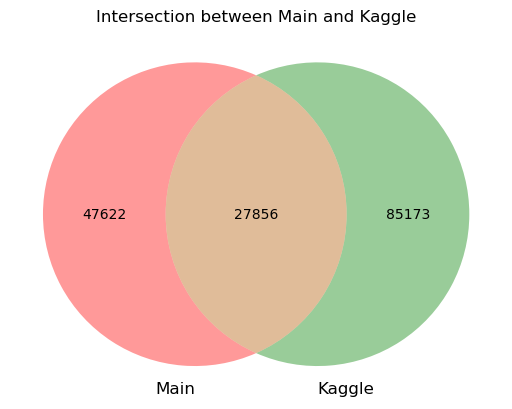

In [83]:
intersectionIMDbID(df_movies, df_movies_additional, 'Main', 'Kaggle', id_column='original_title')

## Additional movie data from Kaggle where budget is not null

In [84]:
df_movies_additional_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15043 entries, 4 to 119928
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   imdb_id            14391 non-null  object 
 1   original_title     14504 non-null  object 
 2   original_language  14504 non-null  object 
 3   budget             14186 non-null  float64
 4   revenue            14496 non-null  object 
 5   title              14178 non-null  object 
dtypes: float64(1), object(5)
memory usage: 822.7+ KB


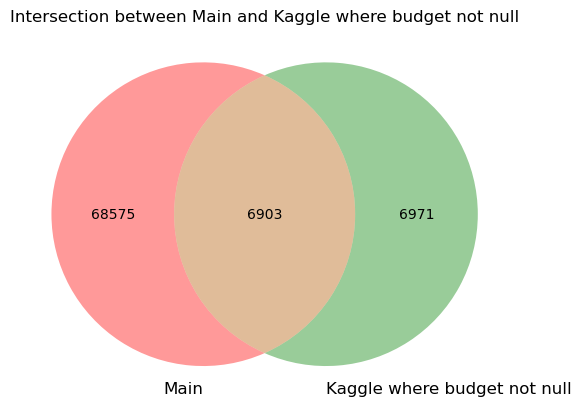

In [85]:
intersectionIMDbID(df_movies, df_movies_additional_filtered, 'Main', 'Kaggle where budget not null', id_column='original_title')

## Inflation dataset from Kaggle

In [90]:
df_inflation_additional_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Yearmon  1296 non-null   object 
 1   CPI      1296 non-null   float64
dtypes: float64(1), object(1)
memory usage: 20.4+ KB


In [98]:
df_inflation_additional_annual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    108 non-null    int32  
 1   CPI     108 non-null    float64
dtypes: float64(1), int32(1)
memory usage: 1.4 KB


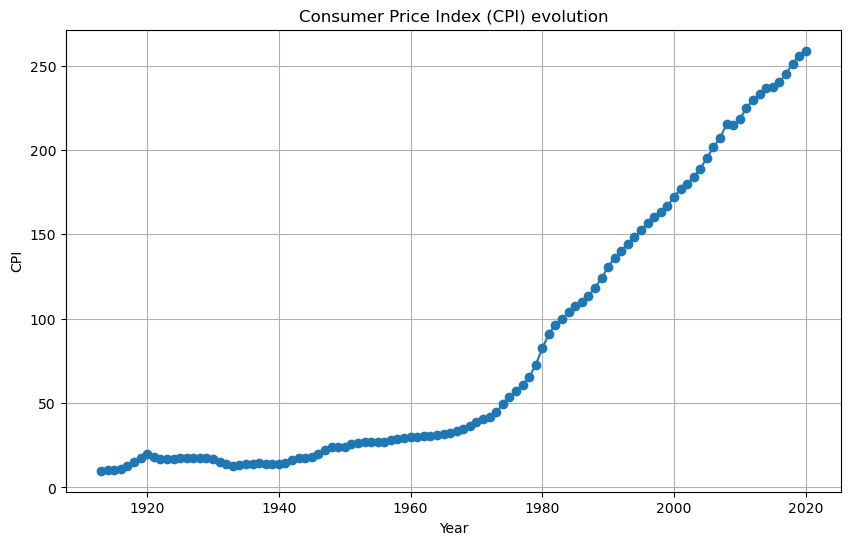

In [107]:
# plot the temporal evolution of the Consumer Price Index (CPI)
plt.figure(figsize=(10, 6))
plt.plot(df_inflation_additional_annual['year'], df_inflation_additional_annual['CPI'], marker='o')
plt.title('Consumer Price Index (CPI) evolution')
plt.xlabel('Year')
plt.ylabel('CPI')
plt.grid()
plt.show()
